In [57]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [58]:
# Import the usual suspects. Any new functions will be introduced individually for clarity.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

# Balance Classes

In [62]:
# First we will balance our classes

# read in dataset
df = pd.read_pickle('data/combined_data_cleaned_corrected.pkl')

0    0.813057
1    0.186943
Name: shootings_abv_avg, dtype: float64


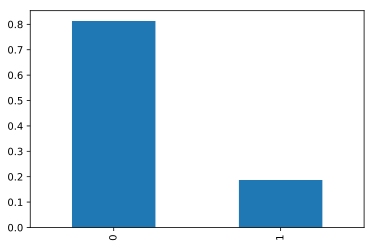

In [64]:
# demonstrate class imbalance
target_pcts = df.shootings_abv_avg.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [65]:
df.columns

Index(['County', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'shootings_abv_avg', 'percent_men'],
      dtype='object')

In [67]:
# Partition the set
X = df.drop(labels = ['County', 'shootings_abv_avg'], axis = 1)
y = df.shootings_abv_avg

In [68]:
# here is the imabalance in y
Counter(y)

Counter({0: 2553, 1: 587})

2553 counties have not had police shootings in the past 3 years, and 587 have

In [69]:
# Now add some random oversampling of the minority classes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

In [79]:
cols = X.columns.values
X_resampled = pd.DataFrame(X_resampled, columns = cols)
y_resampled = pd.Series(y_resampled)

In [70]:
# Show we have now balanced the minority class by oversampling
Counter(y_resampled)

Counter({0: 2553, 1: 2553})

In [80]:
type(y_resampled)

pandas.core.series.Series

# Split data into train, validation, and test sets

In [96]:
## Split the data 80 - 20 train_val/test sets, stratifying on the target variable

X_tr_val, X_te, y_tr_val, y_te = train_test_split(X_resampled, y_resampled, 
                                                  test_size=0.20, random_state=42, 
                                                  stratify = y_resampled)

## Split the train_val into train/val sets, stratifying on the target variable 

X_tr, X_val, y_tr, y_val = train_test_split(X_tr_val, y_tr_val, 
                                            test_size=0.25, random_state=42, 
                                            stratify = y_tr_val)

# Standardize and Fit

In [97]:
type(y_tr)

pandas.core.series.Series

In [98]:
## Fit the scaler to the train set
std = StandardScaler()
std.fit(X_tr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
## Scale the Predictors on the train, val, and test set
X_tr = std.transform(X_tr)
X_val = std.transform(X_val)
X_te = std.transform(X_te)

In [100]:
X_tr = pd.DataFrame(X_tr, columns = cols)
X_val = pd.DataFrame(X_val, columns = cols)
X_te = pd.DataFrame(X_te, columns = cols)

# Save train, val, and test sets for later

In [103]:
# Save them!
type(X_te)

pandas.core.frame.DataFrame

In [105]:
X_tr.to_pickle('data/X_tr.pkl')
X_val.to_pickle('data/X_val.pkl')
X_te.to_pickle('data/X_te.pkl')

y_tr.to_pickle('data/y_tr.pkl')
y_val.to_pickle('data/y_val.pkl')
y_te.to_pickle('data/y_te.pkl')